# Code for the tasks for the final meeting

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Task 1 - Run new controls

* This accession list was generated in a rush therefore we need to filter out based on meta data anything which does not fit as a control

* Note that this is NOT a cell/tissue matched control set. There are multiple tissue types e.g lung, blood. This limits direct comparison. Really just to see if we can see any alpha dup expression in ANY tissue

In [3]:
big_control_df = pd.read_csv('../data_files/mbase_normed/big_control.meta.mbase_norm.csv', index_col=0)

In [4]:
big_control_df.shape

(16773, 50)

In [5]:
def has_dup(df):
    
    dup_value = df['norm_alpha_dup_read_covers_snps_count_exact']
    
    if dup_value == 0:
        
        return False
    else:
        
        return True

In [6]:
big_control_df['has_dup'] = big_control_df.apply(has_dup, axis=1)

In [7]:
print(big_control_df['source_name'].value_counts())

cultured embryonic stem cells                                                       4530
T cells                                                                              569
Human Brain Reference RNA (HBRR) from Ambion                                         423
Universal Human Reference RNA (UHRR) from Stratagene                                 423
Mix of Sample A (UHRR) and Sample B (HBRR) (3:1)                                     395
Mix of Sample A (UHRR) and Sample B (HBRR) (1:3)                                     395
CD4 T cell                                                                           384
Blood                                                                                347
Monocytes                                                                            314
postmortem brain                                                                     294
Human preimplantation embryo                                                         259
Human dermal fibrobla

In [8]:
#Only pick sources which look like they could be from healthy tissue


big_control_df_filtered = big_control_df[
    
    (big_control_df['source_name'] =='T cells') |
    (big_control_df['source_name'] =='Human Brain Reference RNA (HBRR) from Ambion') |
    (big_control_df['source_name'] =='Universal Human Reference RNA (UHRR) from Stratagene') |
    (big_control_df['source_name'] =='CD4 T cell') |
    (big_control_df['source_name'] =='Blood') |
    (big_control_df['source_name'] =='Monocytes') |
    (big_control_df['source_name'] =='Human dermal fibroblasts') |
    (big_control_df['source_name'] =='Blood, control') |
    (big_control_df['source_name'] =='brain') |
    (big_control_df['source_name'] =='Primary foreskin fibroblast cells') |
    (big_control_df['source_name'] =='Immortalised Human Myoblasts') |
    (big_control_df['source_name'] =='Human peripheral blood leukocytes') |
    (big_control_df['source_name'] =='subcutaneous adipose tissue') |
    (big_control_df['source_name'] =='CD4+ T cells') |
    (big_control_df['source_name'] =='Peripheral blood mononuclear cells from 18ml venous whole blood') |
    (big_control_df['source_name'] =='airway smooth muscle cells') |
    (big_control_df['source_name'] =='lung tissue') |
    (big_control_df['source_name'] =='Nasopharyngeal') |
    (big_control_df['source_name'] =='large airway basal cells ') |
    (big_control_df['source_name'] =='Endometrium') |
    (big_control_df['source_name'] =='PBMC') |
    (big_control_df['source_name'] =='Bone Marrow Aspirate') |
    (big_control_df['source_name'] =='Whole Blood') |
    (big_control_df['source_name'] =='Fibroblast') |
    (big_control_df['source_name'] =='Human skin') |
    (big_control_df['source_name'] =='Normal Skin') |
    (big_control_df['source_name'] =='human fibroblasts') |
    (big_control_df['source_name'] =='Mammary epithelial cells') |    
    (big_control_df['source_name'] =='Whole blood') |    
    (big_control_df['source_name'] =='PBMCs') |  
    (big_control_df['source_name'] =='Whole blood cells (PAX)') |    
    (big_control_df['source_name'] =='Skin') |   
    (big_control_df['source_name'] =='Plain, blood') |   
    (big_control_df['source_name'] =='Human peripheral blood') |    
    (big_control_df['source_name'] =='large airway epithelial cells') |    
    (big_control_df['source_name'] =='Purified human monocytes') |    
    (big_control_df['source_name'] =='human bronchial epithelial cells') |    
    (big_control_df['source_name'] =='normal liver') |    
    (big_control_df['source_name'] =='Lung') |    
    (big_control_df['source_name'] =='control_brain') |     
    (big_control_df['source_name'] =='Control') |      
    (big_control_df['source_name'] =='normal control') |      
    (big_control_df['source_name'] =='Peripheral whole blood draw, healthy control ') |      
    (big_control_df['source_name'] =='Heart') |      
    (big_control_df['source_name'] =='normal') |      
    (big_control_df['source_name'] =='esophageal tissue') | 
    (big_control_df['source_name'] =='Human pancreatic islets') |
    (big_control_df['source_name'] =='Liver') |   
    (big_control_df['source_name'] =='control_heart') |   
    (big_control_df['source_name'] =='airway epithelial cells') |   
    (big_control_df['source_name'] =='Lung cells') |   
    (big_control_df['source_name'] =='Intestine                                                                                                                                         ') |   
    (big_control_df['source_name'] =='Peripheral Blood Mononuclear Cells') |   
    (big_control_df['source_name'] =='Peripheral Blood Mononuclear Cells') |   
    (big_control_df['source_name'] =='Peripheral Blood Mononuclear Cells') |   
    (big_control_df['source_name'] =='Peripheral Blood Mononuclear Cells') |   
    (big_control_df['source_name'] =='Peripheral Blood Mononuclear Cells') |   
    (big_control_df['source_name'] =='Peripheral Blood Mononuclear Cells')
]

In [9]:
big_control_df_filtered['cell_type'].value_counts()

Tcells                                          569
CD4 T cell                                      384
Monocytes                                       314
Fibroblast                                      265
large live                                       74
PBMC                                             23
keratinocytes                                    18
Naive B cells                                    16
Peripheral Blood Mononuclear Cells               16
Mammary epithelial cells                         15
fixed cell                                       14
large airway epithelial cells                    10
n-tert keratinocytes                              6
no cell                                           5
FACS-purified alpha cells                         5
fibroblast cell line                              4
breast cancer                                     3
Non-small-cell lung cancer (NSCLC) cells          3
Epidermal keratinocytes                           3
Epidermal ke

In [10]:
# Now filter further to get rid of cancer cells

big_control_df_filtered = big_control_df_filtered[
    
    (big_control_df_filtered['cell_type'] != 'alveolar adenocarcinoma cells') &
    (big_control_df_filtered['cell_type'] != 'Non-small-cell lung cancer (NSCLC) cells') & 
    (big_control_df_filtered['cell_type'] != 'breast cancer') & 
    (big_control_df_filtered['cell_type'] != 'CL1-5') &     
    (big_control_df_filtered['cell_type'] != 'CL1-0') 

]

#big_control_df_filtered.to_csv('big_control.meta.mbase_norm.filter.csv')

* Should now be confident we only have healthy(ish) tissue types

In [11]:
big_control_df_filtered.columns

Index(['Assay_Type', 'AssemblyName', 'AvgSpotLen', 'BioProject', 'BioSample',
       'Center_Name', 'DATASTORE_filetype', 'Experiment', 'InsertSize',
       'Instrument', 'LibraryLayout', 'LibrarySelection', 'LibrarySource',
       'Library_Name', 'LoadDate', 'MBases', 'MBytes', 'Platform',
       'ReleaseDate', 'SRA_Sample', 'SRA_Study', 'Sample_Name', 'cell_type',
       'source_name', 'tissue', 'Consent', 'DATASTORE_provider', 'Organism',
       'file_location', 'source', 'alignment_count', 'alpha_wt_count',
       'alpha_dup_count', 'beta_count', 'alpha_wt_zero_edit_count',
       'alpha_dup_zero_edit_count', 'beta_zero_edit_count',
       'alpha_read_covers_snps_count', 'alpha_dup_read_covers_snps_count',
       'beta_read_covers_snps_count', 'alpha_read_covers_snps_count_exact',
       'alpha_dup_read_covers_snps_count_exact',
       'beta_read_covers_snps_count_exact', 'norm_alignment_count',
       'norm_alpha_wt_count', 'norm_alpha_dup_count', 'norm_beta_count',
       'norm_a

In [12]:
# How many have have each of these?


run_count = big_control_df_filtered.shape[0]
any_expression = big_control_df_filtered[big_control_df_filtered['norm_alignment_count'] !=0].shape[0]

print ("Of the {run_count} runs in this dataframe {any_expression} have some hits in this locus" \
       ". e.g alignment over any area of the genes".format(
           
           run_count = run_count,
           any_expression = any_expression
           
       ))


wt_count = big_control_df_filtered[big_control_df_filtered['norm_alpha_read_covers_snps_count_exact'] != 0].shape[0]

print ("There are {count} runs with reads matching the alpha_wt snps".format(count = wt_count))


dup_count = big_control_df_filtered[big_control_df_filtered['norm_alpha_dup_read_covers_snps_count_exact'] != 0].shape[0]

print ("There are {count} runs with reads matching the alpha_dup snps.".format(count = dup_count))


beta_count = big_control_df_filtered[big_control_df_filtered['norm_beta_read_covers_snps_count_exact'] != 0].shape[0]

print ("There are {count} runs with reads matching the beta snps.".format(count = beta_count))


any_expression = big_control_df_filtered[(big_control_df_filtered['norm_alpha_read_covers_snps_count_exact'] != 0) |
                               (big_control_df_filtered['norm_alpha_dup_read_covers_snps_count_exact'] != 0) |
                               (big_control_df_filtered['norm_beta_read_covers_snps_count_exact'] != 0) 
                               ].shape[0]

print ("Of the {any_expression} runs that show expression across the snps {count} % have alpha dup expression".format(
        any_expression=any_expression,
        count = round((dup_count/any_expression)*100,2)
))

Of the 4126 runs in this dataframe 3184 have some hits in this locus. e.g alignment over any area of the genes
There are 289 runs with reads matching the alpha_wt snps
There are 25 runs with reads matching the alpha_dup snps.
There are 713 runs with reads matching the beta snps.
Of the 835 runs that show expression across the snps 2.99 % have alpha dup expression


In [13]:
# How many have have each of these?
# Should be looking at a per sample basis - does not make big difference?

pivoted_big_control = big_control_df_filtered.pivot_table(index='BioSample')


run_count = pivoted_big_control.shape[0]
any_expression = pivoted_big_control[pivoted_big_control['norm_alignment_count'] !=0].shape[0]

print ("Of the {run_count} samples in this dataframe {any_expression} have some hits in this locus" \
       ". e.g alignment over any area of the genes".format(
           
           run_count = run_count,
           any_expression = any_expression
           
       ))


wt_count = pivoted_big_control[pivoted_big_control['norm_alpha_read_covers_snps_count_exact'] != 0].shape[0]

print ("There are {count} samples with reads matching the alpha_wt snps".format(count = wt_count))


dup_count = pivoted_big_control[pivoted_big_control['norm_alpha_dup_read_covers_snps_count_exact'] != 0].shape[0]

print ("There are {count} samples with reads matching the alpha_dup snps.".format(count = dup_count))


beta_count = pivoted_big_control[pivoted_big_control['norm_beta_read_covers_snps_count_exact'] != 0].shape[0]

print ("There are {count} samples with reads matching the beta snps.".format(count = beta_count))


any_expression = pivoted_big_control[(pivoted_big_control['norm_alpha_read_covers_snps_count_exact'] != 0) |
                               (pivoted_big_control['norm_alpha_dup_read_covers_snps_count_exact'] != 0) |
                               (pivoted_big_control['norm_beta_read_covers_snps_count_exact'] != 0) 
                               ].shape[0]

print ("Of the {any_expression} samples that show expression across the snps {count} % have alpha dup expression".format(
        any_expression=any_expression,
        count = round((dup_count/any_expression)*100,2)
))

Of the 3684 samples in this dataframe 3063 have some hits in this locus. e.g alignment over any area of the genes
There are 286 samples with reads matching the alpha_wt snps
There are 23 samples with reads matching the alpha_dup snps.
There are 676 samples with reads matching the beta snps.
Of the 796 samples that show expression across the snps 2.89 % have alpha dup expression


* So unlike in the geuvadis controls we do have some limited expression

In [14]:
# Which runs have the most expression?

top_25 = big_control_df_filtered.sort_values('norm_alpha_dup_read_covers_snps_count_exact',ascending=False)[
    ['BioProject',
    'BioSample',
    'cell_type',
    'source_name',
    'tissue',
    'norm_alpha_read_covers_snps_count_exact',
    'norm_alpha_dup_read_covers_snps_count_exact',
    'norm_beta_read_covers_snps_count_exact',
    'norm_alignment_count',
    'MBases']].head(50)

Text(0.5,1,'Scatter of alpha wt vs alpha dup expression in control samples')

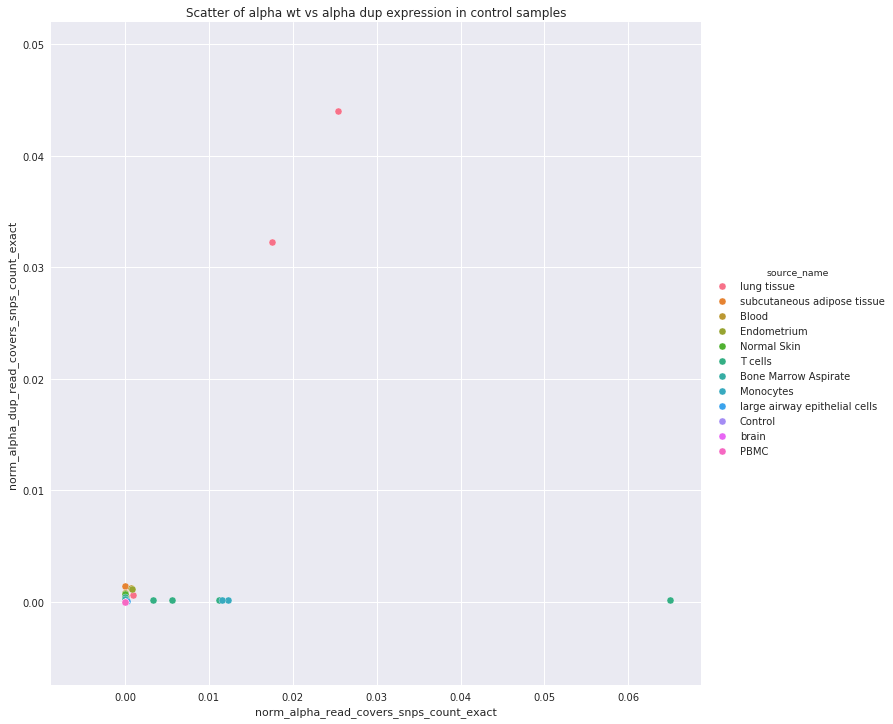

In [15]:
# plot shows the top 50 expressing dup samples


plot = sns.pairplot(x_vars=["norm_alpha_read_covers_snps_count_exact"], y_vars=["norm_alpha_dup_read_covers_snps_count_exact"], data=top_25, hue="source_name", size=10)

axes = plot.axes

axes[0][0].set_title('Scatter of alpha wt vs alpha dup expression in control samples')

In [16]:
big_control_df_filtered.head()

,Assay_Type,AssemblyName,AvgSpotLen,BioProject,BioSample,Center_Name,DATASTORE_filetype,Experiment,InsertSize,Instrument,...,alpha_dup_read_covers_snps_count_exact,beta_read_covers_snps_count_exact,norm_alignment_count,norm_alpha_wt_count,norm_alpha_dup_count,norm_beta_count,norm_alpha_read_covers_snps_count_exact,norm_alpha_dup_read_covers_snps_count_exact,norm_beta_read_covers_snps_count_exact,has_dup
SRR896664,RNA-Seq,NaN,200,PRJNA208369,SAMN02199426,GEO,sra,SRX302131,0,Illumina HiSeq 2000,...,0,0,0.019759,0.006873,0.006873,0.006014,0.0,0.0,0.0,False
SRR896663,RNA-Seq,NaN,200,PRJNA208369,SAMN02199423,GEO,sra,SRX302130,0,Illumina HiSeq 2000,...,0,0,0.010073,0.004579,0.004579,0.000916,0.0,0.0,0.0,False
SRR896665,RNA-Seq,NaN,200,PRJNA208369,SAMN02199422,GEO,sra,SRX302132,0,Illumina HiSeq 2000,...,0,0,0.021657,0.009416,0.009416,0.002825,0.0,0.0,0.0,False
SRR896666,RNA-Seq,NaN,200,PRJNA208369,SAMN02199424,GEO,sra,SRX302133,0,Illumina HiSeq 2000,...,0,0,0.019793,0.006885,0.006885,0.006024,0.0,0.0,0.0,False
SRR896667,RNA-Seq,NaN,200,PRJNA208369,SAMN02199429,GEO,sra,SRX302134,0,Illumina HiSeq 2000,...,0,0,0.014706,0.006434,0.006434,0.001838,0.0,0.0,0.0,False


In [17]:
big_control_df_filtered.groupby('has_dup').mean()

,AvgSpotLen,InsertSize,MBases,MBytes,alignment_count,alpha_wt_count,alpha_dup_count,beta_count,alpha_wt_zero_edit_count,alpha_dup_zero_edit_count,...,alpha_read_covers_snps_count_exact,alpha_dup_read_covers_snps_count_exact,beta_read_covers_snps_count_exact,norm_alignment_count,norm_alpha_wt_count,norm_alpha_dup_count,norm_beta_count,norm_alpha_read_covers_snps_count_exact,norm_alpha_dup_read_covers_snps_count_exact,norm_beta_read_covers_snps_count_exact
has_dup,,,,,,,,,,,,,,,,,,,,,
False,157.60278,0.0,3494.117532,2135.82931,107.17703,23.03365,21.265301,62.878079,11.70495,10.906852,...,0.34455,0.00,2.497927,0.019568,0.00467,0.004401,0.010497,0.000056,0.000000,0.000338
True,167.80000,0.0,6343.760000,3855.68000,1174.32000,488.36000,391.880000,294.080000,309.32000,264.640000,...,42.00000,17.84,17.960000,0.203044,0.08220,0.071105,0.049738,0.006206,0.003499,0.002973


### Comment

* The runs which have detectable alpha dup expression seem to have much higher expression of all loci. Could check against control gene? 

## Task 2 - New Types

* Run a few more disease types through the pipeline

In [18]:
aml_df = pd.read_csv('../data_files/mbase_normed/aml.meta.mbase_norm.csv', index_col=0)
cml_df = pd.read_csv('../data_files/mbase_normed/cml.meta.mbase_norm.csv', index_col=0)
dengue_df = pd.read_csv('../data_files/mbase_normed/dengue.meta.mbase_norm.csv', index_col=0)
sepsis_df = pd.read_csv('../data_files/mbase_normed/sepsis.meta.mbase_norm.csv', index_col=0)
big_control_df = pd.read_csv('../data_files/mbase_normed/big_control.meta.mbase_norm.filter.csv', index_col=0)

In [19]:
master_df = aml_df.append([cml_df,dengue_df,sepsis_df, big_control_df])

Text(0.5,1,'Count of the Number of runs per analysis group')

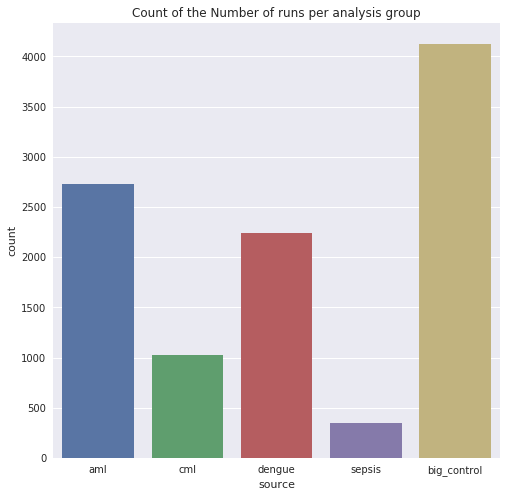

In [54]:
#How many of each type do we have?
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x='source', data=master_df)

ax.set_title('Count of the Number of runs per analysis group')

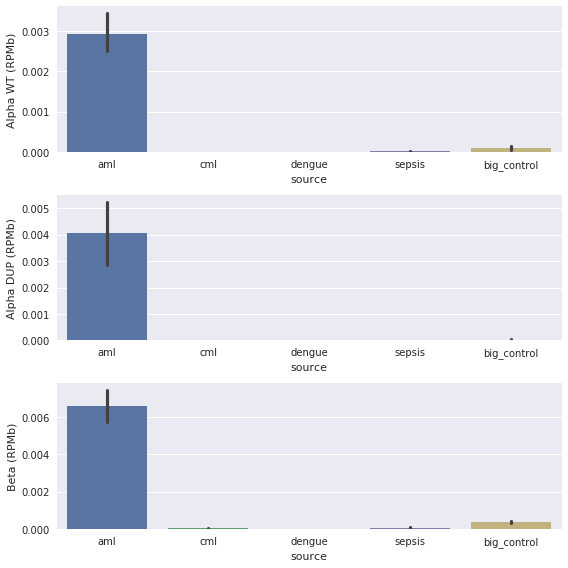

In [56]:
#What are the expression levels of each type?
fig, ax = plt.subplots(3,1,figsize=(8,8))
sns.barplot(x='source', y='norm_alpha_read_covers_snps_count_exact', data=master_df, ax=ax[0])
sns.barplot(x='source', y='norm_alpha_dup_read_covers_snps_count_exact', data=master_df, ax=ax[1])
sns.barplot(x='source', y='norm_beta_read_covers_snps_count_exact', data=master_df, ax=ax[2])

ax[0].set_ylabel('Alpha WT (RPMb)')
ax[1].set_ylabel('Alpha DUP (RPMb)')
ax[2].set_ylabel('Beta (RPMb)')

plt.tight_layout()

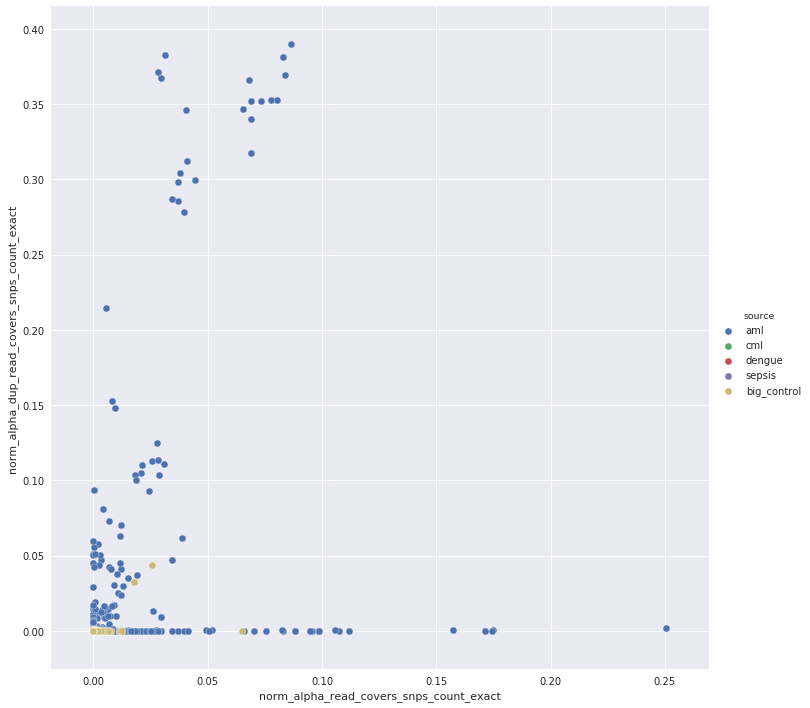

In [22]:
#master_pivot = master_df.pivot_table(index='BioSample')


plot = sns.pairplot(x_vars=["norm_alpha_read_covers_snps_count_exact"], y_vars=["norm_alpha_dup_read_covers_snps_count_exact"], data=master_df, hue='source', size=10)

axes = plot.axes

In [23]:
# How many have have each of these - just look at AML - compare with control results above.
# AML results may be inflated as there could eb the same cell lines multiple times so if this cell line has the dup?

run_count = aml_df.shape[0]
any_expression = aml_df[aml_df['norm_alignment_count'] !=0].shape[0]

print ("Of the {run_count} runs in this dataframe {any_expression} have some hits in this locus" \
       ". e.g alignment over any area of the genes".format(
           
           run_count = run_count,
           any_expression = any_expression
           
       ))


wt_count = aml_df[aml_df['norm_alpha_read_covers_snps_count_exact'] != 0].shape[0]

print ("There are {count} runs with reads matching the alpha_wt snps".format(count = wt_count))


dup_count = aml_df[aml_df['norm_alpha_dup_read_covers_snps_count_exact'] != 0].shape[0]

print ("There are {count} runs with reads matching the alpha_dup snps.".format(count = dup_count))


beta_count = aml_df[aml_df['norm_beta_read_covers_snps_count_exact'] != 0].shape[0]

print ("There are {count} runs with reads matching the beta snps.".format(count = beta_count))


any_expression = aml_df[(aml_df['norm_alpha_read_covers_snps_count_exact'] != 0) |
                               (aml_df['norm_alpha_dup_read_covers_snps_count_exact'] != 0) |
                               (aml_df['norm_beta_read_covers_snps_count_exact'] != 0) 
                               ].shape[0]

print ("Of the {any_expression} runs that show expression across the snps {count} % have alpha dup expression".format(
        any_expression=any_expression,
        count = round((dup_count/any_expression)*100,2)
))

Of the 2725 runs in this dataframe 2614 have some hits in this locus. e.g alignment over any area of the genes
There are 972 runs with reads matching the alpha_wt snps
There are 189 runs with reads matching the alpha_dup snps.
There are 1369 runs with reads matching the beta snps.
Of the 1680 runs that show expression across the snps 11.25 % have alpha dup expression


In [24]:
# How many have have each of these - just look at AML - compare with control results above.
# Per sample basis
# AML results may be inflated as there could eb the same cell lines multiple times so if this cell line has the dup?

pivoted_aml = aml_df.pivot_table(index='BioSample')


run_count = pivoted_aml.shape[0]
any_expression = pivoted_aml[pivoted_aml['norm_alignment_count'] !=0].shape[0]

print ("Of the {run_count} samples in this dataframe {any_expression} have some hits in this locus" \
       ". e.g alignment over any area of the genes".format(
           
           run_count = run_count,
           any_expression = any_expression
           
       ))


wt_count = pivoted_aml[pivoted_aml['norm_alpha_read_covers_snps_count_exact'] != 0].shape[0]

print ("There are {count} samples with reads matching the alpha_wt snps".format(count = wt_count))


dup_count = pivoted_aml[pivoted_aml['norm_alpha_dup_read_covers_snps_count_exact'] != 0].shape[0]

print ("There are {count} samples with reads matching the alpha_dup snps.".format(count = dup_count))


beta_count = pivoted_aml[pivoted_aml['norm_beta_read_covers_snps_count_exact'] != 0].shape[0]

print ("There are {count} samples with reads matching the beta snps.".format(count = beta_count))


any_expression = pivoted_aml[(pivoted_aml['norm_alpha_read_covers_snps_count_exact'] != 0) |
                               (pivoted_aml['norm_alpha_dup_read_covers_snps_count_exact'] != 0) |
                               (pivoted_aml['norm_beta_read_covers_snps_count_exact'] != 0) 
                               ].shape[0]

print ("Of the {any_expression} samples that show expression across the snps {count} % have alpha dup expression".format(
        any_expression=any_expression,
        count = round((dup_count/any_expression)*100,2)
))

Of the 1478 samples in this dataframe 1379 have some hits in this locus. e.g alignment over any area of the genes
There are 516 samples with reads matching the alpha_wt snps
There are 106 samples with reads matching the alpha_dup snps.
There are 646 samples with reads matching the beta snps.
Of the 823 samples that show expression across the snps 12.88 % have alpha dup expression


## Task 3 - Alpha wt / alpha dup ratio

* Look at the Tryptase alpha WT / Tryptase alpha DUP ratio and then look at meta data

In [25]:
def wt_dup_ratio(df):
    
    wt = df['norm_alpha_read_covers_snps_count_exact'] 
    dup = df['norm_alpha_dup_read_covers_snps_count_exact']
    
    try:
    
    
        return dup /wt
    
    except:
        
        return np.nan

In [26]:
master_df['wt_dup_ratio'] =master_df.apply(wt_dup_ratio, axis=1)

Text(0,0.5,'Count')

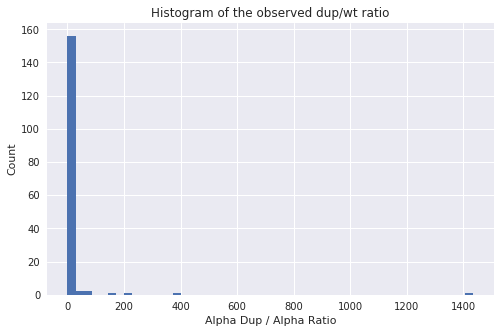

In [65]:
# Of the samples which have some alpha dup expression
fig, ax = plt.subplots(figsize=(8,5))
master_df[master_df['norm_alpha_dup_read_covers_snps_count_exact']!=0]['wt_dup_ratio'].hist(bins=50)

ax.set_title('Histogram of the observed dup/wt ratio')
ax.set_xlabel('Alpha Dup / Alpha Ratio')
ax.set_ylabel('Count')

In [28]:
master_df[master_df['norm_alpha_dup_read_covers_snps_count_exact']!=0].sort_values('wt_dup_ratio', ascending=False)[
    ['source_name',
    'cell_type',
    'tissue',
    'BioProject',
    'BioSample',
    'wt_dup_ratio',
    'norm_alpha_read_covers_snps_count_exact',
    'norm_alpha_dup_read_covers_snps_count_exact',
     'norm_beta_read_covers_snps_count_exact'
    ]    
].head(10)

,source_name,cell_type,tissue,BioProject,BioSample,wt_dup_ratio,norm_alpha_read_covers_snps_count_exact,norm_alpha_dup_read_covers_snps_count_exact,norm_beta_read_covers_snps_count_exact
SRR5626173,NaN,NaN,Peripheral blood or bone marrow,PRJNA386992,SAMN07139337,1436.000000,0.000065,0.093850,0.000000
SRR5626183,NaN,NaN,Peripheral blood or bone marrow,PRJNA386992,SAMN07139333,395.500000,0.000107,0.042379,0.001929
SRR2142322,MonoMac-1,NaN,NaN,PRJNA291825,SAMN03955530,202.000000,0.000275,0.055540,0.000550
SRR1918628,acute myeloid leukemia,acute myeloid leukemia (AML) cells,Heparinised blood,PRJNA278767,SAMN03431221,155.000000,0.000098,0.015236,0.000000
SRR2142317,MonoMac-1,NaN,NaN,PRJNA291825,SAMN03955530,85.500000,0.000594,0.050757,0.000000
SRR2142321,MonoMac-1,NaN,NaN,PRJNA291825,SAMN03955530,80.000000,0.000635,0.050761,0.000000
SRR5626188,NaN,NaN,Peripheral blood or bone marrow,PRJNA386992,SAMN07139330,38.633333,0.005551,0.214458,0.002529
SRR1608641,acute myeloid leukemia,acute myeloid leukemia,Bone marrow,PRJNA263397,SAMN03100261,30.111111,0.001926,0.057980,0.000214
SRR620034,NaN,NaN,NaN,PRJNA181310,SAMN01816537,28.666667,0.000660,0.018926,0.000000
SRR3066069,Mono mac6 cell,NaN,peripheral blood,PRJNA307239,SAMN04377048,24.000000,0.000605,0.014510,0.000000


In [58]:
master_df[master_df['BioProject'] =='PRJNA386992'][['source_name',
    'alignment_count',
    'MBases',
    'cell_type',
    'tissue',
    'BioProject',
    'BioSample',
    'wt_dup_ratio',
    'norm_alpha_read_covers_snps_count_exact',
    'norm_alpha_dup_read_covers_snps_count_exact',
     'norm_beta_read_covers_snps_count_exact'
    ]    ].sort_values('wt_dup_ratio', ascending=False)

,source_name,alignment_count,MBases,cell_type,tissue,BioProject,BioSample,wt_dup_ratio,norm_alpha_read_covers_snps_count_exact,norm_alpha_dup_read_covers_snps_count_exact,norm_beta_read_covers_snps_count_exact
SRR5626173,NaN,65055,15301,NaN,Peripheral blood or bone marrow,PRJNA386992,SAMN07139337,1436.000000,0.000065,0.093850,0.000000
SRR5626183,NaN,46402,18665,NaN,Peripheral blood or bone marrow,PRJNA386992,SAMN07139333,395.500000,0.000107,0.042379,0.001929
SRR5626188,NaN,173788,16213,NaN,Peripheral blood or bone marrow,PRJNA386992,SAMN07139330,38.633333,0.005551,0.214458,0.002529
SRR5626190,NaN,6905,17923,NaN,Peripheral blood or bone marrow,PRJNA386992,SAMN07139332,0.000000,0.000056,0.000000,0.000000
SRR5626187,NaN,18706,15437,NaN,Peripheral blood or bone marrow,PRJNA386992,SAMN07139327,0.000000,0.005636,0.000000,0.021572
SRR5626182,NaN,949,19174,NaN,Peripheral blood or bone marrow,PRJNA386992,SAMN07139334,0.000000,0.000156,0.000000,0.000000
SRR5626181,NaN,2584,15729,NaN,Peripheral blood or bone marrow,PRJNA386992,SAMN07139344,0.000000,0.001272,0.000000,0.000763
SRR5626180,NaN,8053,13530,NaN,Peripheral blood or bone marrow,PRJNA386992,SAMN07139345,0.000000,0.005174,0.000000,0.000074
SRR5626179,NaN,2425,17637,NaN,Peripheral blood or bone marrow,PRJNA386992,SAMN07139339,0.000000,0.000057,0.000000,0.003459
SRR5626176,NaN,3032,13327,NaN,Peripheral blood or bone marrow,PRJNA386992,SAMN07139343,0.000000,0.001501,0.000000,0.000000


* Note that the top two runs are from the same study PRJNA386992. This is a study looking at double minutes.
* See https://academic.oup.com/nar/article/42/14/9131/1273016
* Bioproject: https://www.ncbi.nlm.nih.gov/bioproject/?term=PRJNA386992
* Quick look at the karyotype of those two samples shows complex stuff going on at chr16

In [29]:
print ('The ratio in this bioproject is: ', round(master_df[master_df['BioProject'] =='PRJNA386992' ]['wt_dup_ratio'].mean(),2))
print ('Compared to an average of: ', round(master_df['wt_dup_ratio'].mean(),2))

The ratio in this bioproject is:  187.01
Compared to an average of:  2.32


In [30]:
# Top bioprojects
master_df.pivot_table(index='BioProject').sort_values('wt_dup_ratio', ascending=False).head()

,AvgSpotLen,InsertSize,MBases,MBytes,alignment_count,alpha_dup_count,alpha_dup_read_covers_snps_count,alpha_dup_read_covers_snps_count_exact,alpha_dup_zero_edit_count,alpha_read_covers_snps_count,...,norm_alignment_count,norm_alpha_dup_count,norm_alpha_dup_read_covers_snps_count_exact,norm_alpha_read_covers_snps_count_exact,norm_alpha_wt_count,norm_beta_count,norm_beta_read_covers_snps_count_exact,organ_failure_count,sirs_signs,wt_dup_ratio
BioProject,,,,,,,,,,,,,,,,,,,,,
PRJNA386992,201.5,0.0,14623.363636,8929.772727,16123.500000,7892.227273,303.909091,259.272727,6473.181818,29.681818,...,1.012932,0.492457,0.015940,0.000890,0.461218,0.059256,0.002609,NaN,NaN,187.013333
PRJNA291825,200.0,0.0,6324.222222,4009.555556,2565.555556,1358.555556,138.000000,117.555556,1120.333333,9.666667,...,0.684765,0.371003,0.033727,0.000174,0.306737,0.007024,0.000177,NaN,NaN,91.875000
PRJNA307239,51.0,0.0,1743.875000,1151.125000,7390.625000,3642.375000,5.875000,5.625000,3247.625000,0.125000,...,4.673993,2.302847,0.004024,0.000076,2.294413,0.076733,0.000000,NaN,NaN,24.000000
PRJNA413146,202.0,0.0,8249.875000,3495.375000,704.250000,328.125000,33.000000,27.875000,282.500000,17.625000,...,0.074280,0.033548,0.002748,0.001220,0.031362,0.009370,0.001037,NaN,NaN,2.649425
PRJEB6573,102.0,225.0,2080.887097,1408.620968,2306.911290,1330.298387,3.637097,2.822581,1016.879032,0.677419,...,1.026678,0.593142,0.001254,0.000198,0.315991,0.117546,0.000154,NaN,NaN,1.667143


In [31]:
master_df['has_dup'] = master_df.apply(has_dup, axis=1)

In [32]:
# Compare this with the big_control group above. Also you can see that the expression level is generally much higher in \
# samples with the duplicaton. Is it just that we can only see the duplication when expression levels are very high?

master_df.groupby('has_dup').mean()

,AvgSpotLen,InsertSize,MBases,MBytes,alignment_count,alpha_dup_count,alpha_dup_read_covers_snps_count,alpha_dup_read_covers_snps_count_exact,alpha_dup_zero_edit_count,alpha_read_covers_snps_count,...,norm_alpha_dup_read_covers_snps_count_exact,norm_alpha_read_covers_snps_count_exact,norm_alpha_wt_count,norm_beta_count,norm_beta_read_covers_snps_count_exact,organ_failure_count,sirs_signs,virus,virus_qpcr,wt_dup_ratio
has_dup,,,,,,,,,,,,,,,,,,,,,
False,135.465411,6.963021,3217.937848,1872.959020,334.888574,94.414479,0.070251,0.000000,58.379159,5.070739,...,0.000000,0.000476,0.023774,0.028847,0.001660,1.168675,1.373494,NaN,NaN,0.000000
True,178.112150,5.257009,5706.700935,3354.462617,15030.392523,7268.238318,282.672897,229.962617,5962.883178,140.883178,...,0.051908,0.016336,1.596742,0.249067,0.011491,NaN,NaN,NaN,NaN,18.130157


### What is different about AML samples that express alpha dup?

In [33]:
aml_df.head()

,Assay_Type,AssemblyName,AvgSpotLen,BioProject,BioSample,Center_Name,DATASTORE_filetype,Experiment,InsertSize,Instrument,...,alpha_read_covers_snps_count_exact,alpha_dup_read_covers_snps_count_exact,beta_read_covers_snps_count_exact,norm_alignment_count,norm_alpha_wt_count,norm_alpha_dup_count,norm_beta_count,norm_alpha_read_covers_snps_count_exact,norm_alpha_dup_read_covers_snps_count_exact,norm_beta_read_covers_snps_count_exact
SRR330925,RNA-Seq,NaN,36,PRJNA145991,SAMN00709303,GEO,sra,SRX091763,0,Illumina Genome Analyzer II,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
SRR330926,RNA-Seq,NaN,36,PRJNA145991,SAMN00709304,GEO,sra,SRX091764,0,Illumina Genome Analyzer II,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
SRR330927,RNA-Seq,NaN,36,PRJNA145991,SAMN00709305,GEO,sra,SRX091765,0,Illumina Genome Analyzer II,...,0,0,0,0.034965,0.013986,0.013986,0.006993,0.0,0.0,0.0
SRR330928,RNA-Seq,NaN,36,PRJNA145991,SAMN00709306,GEO,sra,SRX091766,0,Illumina Genome Analyzer II,...,0,0,0,0.005450,0.000000,0.000000,0.005450,0.0,0.0,0.0
SRR330929,RNA-Seq,NaN,36,PRJNA145991,SAMN00709307,GEO,sra,SRX091767,0,Illumina Genome Analyzer II,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [34]:
express_dup = aml_df[aml_df['norm_alpha_dup_read_covers_snps_count_exact'] >0.25]
no_dup = aml_df[aml_df['norm_alpha_dup_read_covers_snps_count_exact'] <0.25]

In [35]:
express_dup['BioSample'].value_counts()

SAMN03100244    8
SAMN03100234    8
SAMN02419503    3
SAMN03418065    3
Name: BioSample, dtype: int64

In [36]:
no_dup['BioSample'].value_counts()

SAMN03980004    21
SAMN01120802    11
SAMN02419512     8
SAMN03100247     8
SAMN03100242     8
SAMN03100249     8
SAMN03979211     8
SAMN03100272     8
SAMN03100231     8
SAMN03100233     8
SAMN03100279     8
SAMN03100277     8
SAMN03100278     8
SAMN02419508     8
SAMN03100235     8
SAMN03100246     8
SAMN03979994     8
SAMN02419523     8
SAMN03979209     8
SAMN03100239     8
SAMN03100282     8
SAMN03100265     8
SAMN03979992     8
SAMN03100232     8
SAMN03979210     8
SAMN03100240     8
SAMN03100281     8
SAMN03100248     8
SAMN03100238     8
SAMN02419519     8
                ..
SAMN06481179     1
SAMN04396102     1
SAMN02313826     1
SAMN07411179     1
SAMN05735909     1
SAMN03220418     1
SAMN05389125     1
SAMN03944884     1
SAMN04913651     1
SAMN04913656     1
SAMN03955533     1
SAMN08167248     1
SAMN06690548     1
SAMN06174534     1
SAMN06015713     1
SAMN07139330     1
SAMN06689266     1
SAMN00709337     1
SAMN04377045     1
SAMN07411194     1
SAMN07981777     1
SAMN07981778

## Task 5 - Retro Virus Analysis

* From a previous Hackathon we have some data showing Human Endogenous Retrovirus (HER) expression for (some ~1500) of the AML dataset.

* A longshot but can we see any correlation between HER expression and the tryptase locus?

* Note: results show no obvious link

In [37]:
virus_df = pd.read_csv('../data_files/alldata.normalised.zeroes.csv', index_col=0)

In [38]:
virus_df = virus_df[virus_df['type'] =='aml']
grouped_by_run = virus_df.groupby('acc').sum()['count']
aml_virus_df = aml_df.join(grouped_by_run)

In [39]:
aml_virus_df['normalised_virus_count'] = aml_virus_df['count'] / aml_virus_df['MBases']

In [40]:
aml_virus_df = aml_virus_df[aml_virus_df['normalised_virus_count'].isnull() == False]

In [41]:
aml_virus_df.pivot_table(index='BioSample').sort_values('normalised_virus_count', ascending=False).head()

,AvgSpotLen,InsertSize,MBases,MBytes,alignment_count,alpha_dup_count,alpha_dup_read_covers_snps_count,alpha_dup_read_covers_snps_count_exact,alpha_dup_zero_edit_count,alpha_read_covers_snps_count,...,beta_zero_edit_count,count,norm_alignment_count,norm_alpha_dup_count,norm_alpha_dup_read_covers_snps_count_exact,norm_alpha_read_covers_snps_count_exact,norm_alpha_wt_count,norm_beta_count,norm_beta_read_covers_snps_count_exact,normalised_virus_count
BioSample,,,,,,,,,,,,,,,,,,,,,
SAMN03431117,200.0,0.0,9756.0,4231.0,4571.0,1555.0,0.0,0.0,802.0,202.5,...,649.0,1888553.0,0.468532,0.159391,0.0,0.016713,0.198508,0.110632,0.006919,194.335563
SAMN03431062,200.0,0.0,8326.5,3814.5,282.0,23.5,0.5,0.0,4.5,1.0,...,158.0,1546677.5,0.033859,0.002823,0.0,0.000000,0.002944,0.028092,0.002340,185.090479
SAMN03431109,200.0,0.0,8999.0,4322.0,171.0,74.5,0.0,0.0,64.5,3.5,...,11.5,1643642.5,0.019015,0.008284,0.0,0.000333,0.009006,0.001724,0.000000,183.996698
SAMN03220440,100.0,0.0,1840.0,1277.5,8.0,2.5,0.0,0.0,2.5,0.0,...,2.5,87429.0,0.003498,0.001034,0.0,0.000000,0.001034,0.001430,0.000000,52.702507
SAMN03431038,200.0,0.0,10878.0,5013.5,61.0,4.5,0.0,0.0,4.5,0.0,...,39.0,515584.5,0.005611,0.000415,0.0,0.000000,0.000415,0.004782,0.000137,47.070539


In [42]:
aml_virus_df['wt_dup_ratio'] =aml_virus_df.apply(wt_dup_ratio, axis=1)

In [43]:
aml_virus_df[aml_virus_df['norm_alpha_dup_read_covers_snps_count_exact']!=0][['normalised_virus_count', 'wt_dup_ratio']].corr()

,normalised_virus_count,wt_dup_ratio
normalised_virus_count,1.000000,-0.049291
wt_dup_ratio,-0.049291,1.000000


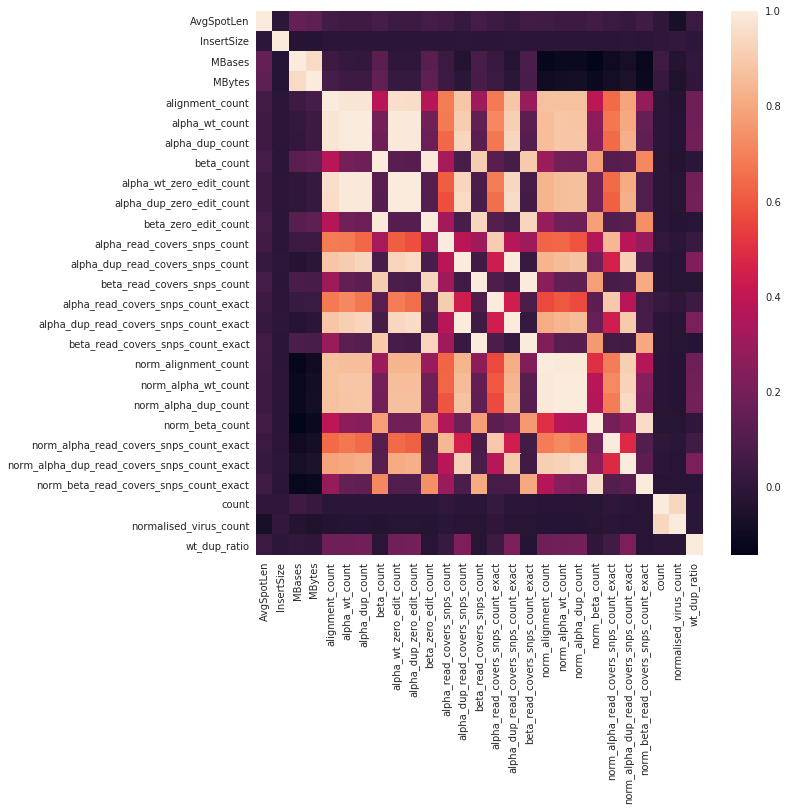

In [44]:
fig, ax = plt.subplots(figsize=(10,10)) 

sns.heatmap(aml_virus_df.corr(), ax=ax)